# Data augmentation analysis

## Generate balanced dataset

In [1]:
from utils import data_import, data_augmentation

In [2]:
import imageio
import numpy as np
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt
%matplotlib inline

Import MNIST dataset from OpenML

In [3]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# Fashion-MNIST
# CIFAR_10

Generate balanced dataset with the smallest label sample

In [4]:
d = data_import.generate_balanced_dictionary(X,y)

Return with the same format as before

In [5]:
X, y = data_import.lists_from_dict(d)

In [6]:
unique, counts = np.unique(y, return_counts=True)
print(unique)
print(counts)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[6313 6313 6313 6313 6313 6313 6313 6313 6313 6313]


Resize images according to the documentation to the original 28x28 size

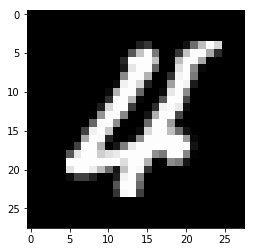

In [7]:
image = np.resize(X[0], (28,28))
plt.imshow(image, cmap='gray')
plt.show()

Generating reduced dataset

In [8]:
d1, label = data_import.reduce_class_samples(d)

Save images to file

In [9]:
data_augmentation.save_label_to_file(d1,'4',(28,28), 10)

10

Generate augmented images

In [10]:
data_augmentation.generate_augmented_data(50,"rotate")

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7F6A1C03DBD0>:  58%|█████▊    | 29/50 [00:00<00:00, 89.64 Samples/s]

Initialised with 10 image(s) found.
Output directory set to augment/input/../output/rotate/.

Processing <PIL.Image.Image image mode=L size=28x28 at 0x7F6A1BFF42D0>: 100%|██████████| 50/50 [00:00<00:00, 159.52 Samples/s]


Read back an image (saved as lossless PNG)

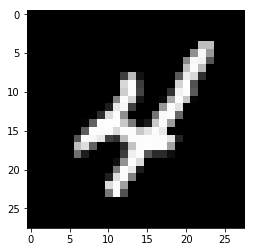

In [11]:
image = imageio.imread("augment/input/test1.PNG")
plt.imshow(image, cmap='gray')
plt.show()

Load back the generated images to the dictionary

In [12]:
print(np.shape(d['4']))
data_augmentation.load_augmented_data(d,'4',"rotate")
print(np.shape(d['4']))

(6313, 784)
(6363, 784)
